In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
def generate_cov(zl, zr, sigma_n, sigma_a):
    cov = np.array([[zl*sigma_a**2+sigma_n**2,zl*zr*sigma_a**2],[zl*zr*sigma_a**2,zr*sigma_a**2+sigma_n**2]])
    return cov

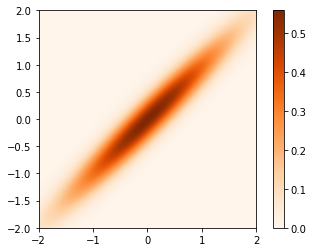

In [3]:
rv_11 = multivariate_normal(cov = generate_cov(1,1,0.2,1))
rv_01 = multivariate_normal(cov = generate_cov(0,1,0.2,1))
rv_10 = multivariate_normal(cov = generate_cov(1,0,0.2,1))
rv_00 = multivariate_normal(cov = generate_cov(0,0,0.2,1))
x, y = np.mgrid[-2:2:.01, -2:2:.01]
pos = np.dstack((x, y))
plt.imshow(np.flip(rv_11.pdf(pos),axis= 0),extent = [-2,2,-2,2],cmap='Oranges',)
plt.colorbar()

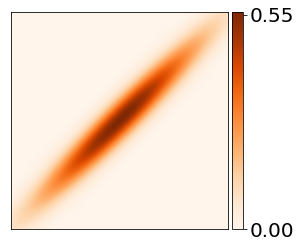

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(np.flip(rv_11.pdf(pos),axis= 0),extent = [-2,2,-2,2], cmap='Oranges')
#ax.set_xlabel('$x_r$',labelpad=-20) #labelpad=-10: move label upward
#ax.set_ylabel('$x_l$',labelpad=-20) #labelpad=-10: move label to the right
#ax.set_xticks([-2,2])
#ax.set_yticks([-2,2])
ax.set_xticks([])
ax.set_yticks([])
ax.set_box_aspect(1) #set the shape of plot to a square
fig.colorbar(im, cax=cax, orientation='vertical').set_ticks([0,0.55])
plt.rcParams['font.size'] = '20'
fig.savefig('zlzr_11.svg')

plt.show()

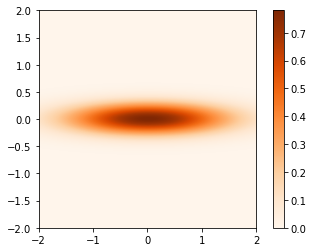

In [53]:
plt.imshow(np.flip(rv_01.pdf(pos),axis= 0),extent = [-2,2,-2,2],cmap='Oranges',)
plt.colorbar()

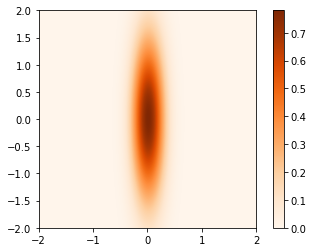

In [55]:
plt.imshow(np.flip(rv_10.pdf(pos),axis= 0),extent = [-2,2,-2,2],cmap='Oranges',)
plt.colorbar()

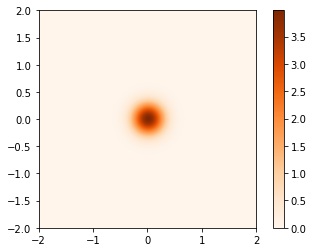

In [56]:
plt.imshow(np.flip(rv_00.pdf(pos),axis= 0),extent = [-2,2,-2,2],cmap='Oranges',)
plt.colorbar()

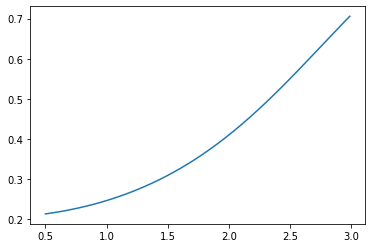

In [41]:
x = np.arange(0.5,3,0.01)
p01 = np.exp(-50.5*x**2)/(0.01*(0.01+1)**2)
p11 = np.exp(-50.2487*x**2)/np.linalg.det(np.array([[1.01,0,1,0],[0,1.01,0,1],[1,0,1.01,0],[0,1,0,1.01]]))**0.5
plt.plot(x,p11/(p11+2*p01))